In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('/content/drive/MyDrive/AML/students_mental_health_survey.csv')
data = data.dropna()
data

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
5,21,Medical,Female,3.35,2,4,3,Good,Moderate,Good,High,Single,Never,Never,No,No,5,Moderate,19,Off-Campus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,20,Law,Female,3.33,1,1,1,Average,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,3,Moderate,29,Off-Campus
7017,20,Law,Female,3.69,3,1,5,Good,Low,Poor,High,Single,Never,Frequently,Yes,No,1,High,26,Off-Campus
7018,24,Medical,Female,3.73,3,4,1,Good,Moderate,Average,High,Single,Never,Occasionally,No,No,3,Low,15,Off-Campus
7019,26,Others,Male,3.65,4,5,1,Good,High,Poor,Moderate,Married,Never,Occasionally,No,Yes,4,Moderate,17,Off-Campus


In [3]:
data['Stress_Binary'] = (data['Stress_Level'] > 2).astype(int)

In [4]:
for column in data.columns:
    print(f"Column: {column}")
    print(data[column].unique())
    print("-" * 50)


Column: Age
[25 24 19 18 21 22 27 20 31 26 35 23 30 32 29 28 34 33]
--------------------------------------------------
Column: Course
['Others' 'Engineering' 'Business' 'Medical' 'Law' 'Computer Science']
--------------------------------------------------
Column: Gender
['Male' 'Female']
--------------------------------------------------
Column: CGPA
[3.56 2.44 3.74 3.4  3.35 3.65 3.8  3.19 3.26 3.2  3.61 3.85 3.46 3.43
 3.38 3.5  3.6  3.08 3.88 3.21 3.62 3.16 3.71 3.48 3.27 3.41 3.22 3.33
 3.01 3.97 4.   3.63 2.99 3.11 3.02 3.66 3.09 3.12 3.82 3.23 3.7  3.73
 3.79 3.59 3.34 3.87 3.24 3.44 3.1  3.25 3.53 3.   3.29 2.98 3.04 3.51
 3.75 3.86 3.78 3.77 3.72 3.45 3.06 3.05 3.84 3.92 3.28 2.86 3.64 3.37
 3.54 3.31 3.94 3.9  3.52 3.32 3.14 3.68 2.85 2.91 3.99 3.81 3.07 3.3
 3.39 3.42 3.55 2.94 3.93 3.36 3.67 3.91 3.49 3.58 3.13 3.69 3.98 3.47
 2.92 3.15 2.79 3.83 3.57 3.89 2.97 3.76 3.17 3.03 2.77 2.87 2.64 2.84
 2.88 2.8  2.95 3.18 2.89 2.82 2.73 2.96 3.96 2.83 2.7  3.95 2.76 2.68
 2.93 2.9

In [5]:
#X = data[['Age','Gender','CGPA','Stress_Level',	'Depression_Score',	'Anxiety_Score',	'Sleep_Quality',	'Physical_Activity',	'Diet_Quality',	'Social_Support',	'Relationship_Status',	'Substance_Use',	'Counseling_Service_Use',	'Family_History',	'Chronic_Illness',	'Financial_Stress',	'Extracurricular_Involvement',	'Semester_Credit_Load',	'Residence_Type']]
data = data.dropna()
X = data[['Age','Gender','CGPA',	'Sleep_Quality',	'Physical_Activity',	'Diet_Quality',	'Social_Support',	'Relationship_Status',	'Substance_Use',	'Counseling_Service_Use',	'Family_History',	'Chronic_Illness',	'Financial_Stress',	'Extracurricular_Involvement',	'Semester_Credit_Load',	'Residence_Type']]
y = data['Stress_Level']

# Target remains binary
y = data['Stress_Binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





#MLP

In [6]:
num_cols = ['Age','CGPA',		'Financial_Stress',		'Semester_Credit_Load']
cat_cols = ['Gender','Sleep_Quality','Physical_Activity',	'Diet_Quality',	'Social_Support',	'Relationship_Status',	'Substance_Use',	'Counseling_Service_Use',	'Family_History',	'Chronic_Illness','Extracurricular_Involvement','Residence_Type']

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlp', MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42))
])



In [7]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'CGPA',
                                                   'Financial_Stress',
                                                   'Semester_Credit_Load']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Sleep_Quality',
                                                   'Physical_Activity',
                                                   'Diet_Quality',
                                                   'Social_Support',
                                                   'Relationship_Status',
                                                   'Substance_Use',
                                                   'Counseling_Service_Use',
                                                   'Family_History',
                                                   'Chronic_Illness',
                                                   'Extracurricular_Involvement',
                                                   'Residence_Type'])])),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000,
                               random_state=42))])

In [8]:

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.51      0.50       717
           1       0.47      0.46      0.46       682

    accuracy                           0.48      1399
   macro avg       0.48      0.48      0.48      1399
weighted avg       0.48      0.48      0.48      1399



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.18


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[30 33 40 51 30 24]
 [39 45 37 58 40 42]
 [47 44 44 48 26 39]
 [38 52 45 73 35 41]
 [22 33 36 43 28 33]
 [25 39 37 38 31 33]]


In [ ]:
ordinal_mapping = {
    'Sleep_Quality': {'Poor': 0, 'Average': 1, 'Good': 2},
    'Physical_Activity': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Diet_Quality': {'Poor': 0, 'Average': 1, 'Good': 2},
    'Social_Support': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Financial_Stress': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
}


In [ ]:
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[
        ['Poor', 'Average', 'Good'], # Sleep_Quality
        ['Low', 'Moderate', 'High'], # Physical_Activity
        ['Poor', 'Average', 'Good'], # Diet_Quality
        ['Low', 'Moderate', 'High'], # Social_Support
        [0, 1, 2, 3, 4, 5]           # Financial_Stress
    ]))
])


In [ ]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat_onehot', categorical_transformer, ['Gender', 'Relationship_Status',
                                                 'Substance_Use', 'Counseling_Service_Use',
                                                 'Family_History', 'Chronic_Illness',
                                                 'Extracurricular_Involvement', 'Residence_Type']),
        ('cat_ordinal', ordinal_transformer, ['Sleep_Quality', 'Physical_Activity',
                                              'Diet_Quality', 'Social_Support', 'Financial_Stress'])
    ])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlp', MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42))
])



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'mlp__hidden_layer_sizes': [(64,), (128, 64), (128, 64, 32)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__solver': ['adam', 'sgd'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate': ['constant', 'adaptive']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'CGPA',
                                                   'Financial_Stress',
                                                   'Semester_Credit_Load']),
                                                 ('cat_onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Relationship_Status',
                                                   'Substance_Use',
                                                   'Counseling_Service_Use',
                                                   'Family_History',
                                                   'Ch...
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Poor',
                                                                                               'Average',
                                                                                               'Good'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High'],
                                                                                              ['Poor',
                                                                                               'Average',
                                                                                               'Good'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High'],
                                                                                              [0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5]]))]),
                                                  ['Sleep_Quality',
                                                   'Physical_Activity',
                                                   'Diet_Quality',
                                                   'Social_Support',
                                                   'Financial_Stress'])])),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000,
                               random_state=42))])

In [ ]:

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.13      0.13       208
           1       0.19      0.20      0.19       261
           2       0.18      0.19      0.18       248
           3       0.23      0.24      0.24       284
           4       0.17      0.17      0.17       195
           5       0.15      0.14      0.15       203

    accuracy                           0.18      1399
   macro avg       0.18      0.18      0.18      1399
weighted avg       0.18      0.18      0.18      1399



#RF


In [ ]:
num_cols = ['Age','CGPA',		'Financial_Stress',		'Semester_Credit_Load']
cat_cols = ['Gender','Sleep_Quality','Physical_Activity',	'Diet_Quality',	'Social_Support',	'Relationship_Status',	'Substance_Use',	'Counseling_Service_Use',	'Family_History',	'Chronic_Illness','Extracurricular_Involvement','Residence_Type']

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])


In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'CGPA',
                                                   'Financial_Stress',
                                                   'Semester_Credit_Load']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Sleep_Quality',
                                                   'Physical_Activity',
                                                   'Diet_Quality',
                                                   'Social_Support',
                                                   'Relationship_Status',
                                                   'Substance_Use',
                                                   'Counseling_Service_Use',
                                                   'Family_History',
                                                   'Chronic_Illness',
                                                   'Extracurricular_Involvement',
                                                   'Residence_Type'])])),
                ('rf', RandomForestClassifier(random_state=42))])

In [ ]:

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.57      0.54       717
           1       0.49      0.43      0.46       682

    accuracy                           0.50      1399
   macro avg       0.50      0.50      0.50      1399
weighted avg       0.50      0.50      0.50      1399



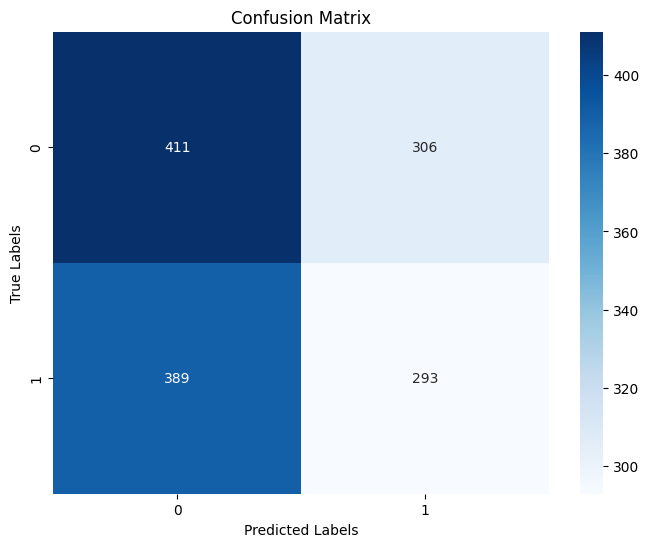

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
ordinal_mapping = {
    'Sleep_Quality': {'Poor': 0, 'Average': 1, 'Good': 2},
    'Physical_Activity': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Diet_Quality': {'Poor': 0, 'Average': 1, 'Good': 2},
    'Social_Support': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Financial_Stress': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
}


In [ ]:
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[
        ['Poor', 'Average', 'Good'], # Sleep_Quality
        ['Low', 'Moderate', 'High'], # Physical_Activity
        ['Poor', 'Average', 'Good'], # Diet_Quality
        ['Low', 'Moderate', 'High'], # Social_Support
        [0, 1, 2, 3, 4, 5]           # Financial_Stress
    ]))
])


In [ ]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat_onehot', categorical_transformer, ['Gender', 'Relationship_Status',
                                                 'Substance_Use', 'Counseling_Service_Use',
                                                 'Family_History', 'Chronic_Illness',
                                                 'Extracurricular_Involvement', 'Residence_Type']),
        ('cat_ordinal', ordinal_transformer, ['Sleep_Quality', 'Physical_Activity',
                                              'Diet_Quality', 'Social_Support', 'Financial_Stress'])
    ])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])



In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'CGPA',
                                                   'Financial_Stress',
                                                   'Semester_Credit_Load']),
                                                 ('cat_onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Relationship_Status',
                                                   'Substance_Use',
                                                   'Counseling_Service_Use',
                                                   'Family_History',
                                                   'Ch...
                                                   'Residence_Type']),
                                                 ('cat_ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Poor',
                                                                                               'Average',
                                                                                               'Good'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High'],
                                                                                              ['Poor',
                                                                                               'Average',
                                                                                               'Good'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High'],
                                                                                              [0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5]]))]),
                                                  ['Sleep_Quality',
                                                   'Physical_Activity',
                                                   'Diet_Quality',
                                                   'Social_Support',
                                                   'Financial_Stress'])])),
                ('rf', RandomForestClassifier(random_state=42))])

In [ ]:

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.57      0.54       717
           1       0.48      0.41      0.44       682

    accuracy                           0.49      1399
   macro avg       0.49      0.49      0.49      1399
weighted avg       0.49      0.49      0.49      1399



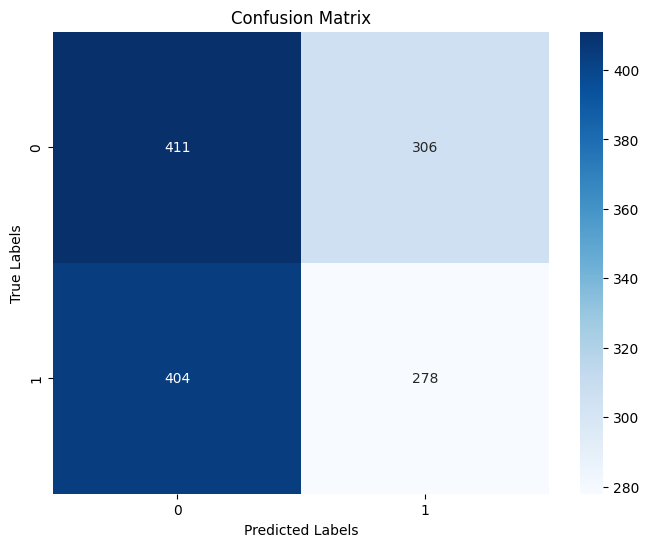

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()